# Mudanças nas faixas do Imposto de Renda Pessoa Física do Brasil

Ninguém gosta de pagar imposto. Ninguém. Ponto. Nós gostamos dos benefícios, de viver em uma sociedade funcional, mas não de pagar a conta. E é por isso que em um país com serviços e infraestrutura capengas pagar um imposto alto passa a mesma sensação de pagar 20 reais de covert para um Voz e Violão de Jorge Vercilo num McDonalds. E é por isso que qualquer tentativa de reduzir [ou aumentar] a quantidade de impostos é recebida com muita alegria [ou raiva].

Logo, não é surpresa para ninguém que o [Projeto de Lei do Senado n° 517 de 2015](https://www25.senado.leg.br/web/atividade/materias/-/materia/122597) chame tanta atenção. Ele propõe a alteração da tabela de cobrança do imposto de renda para pessoa física da seguinte forma:  

In [87]:
import pandas as pd

pl2015_taxbrackets = pd.read_csv("PL2015_TaxBrackets.csv",index_col=False)

pl2015_taxbrackets.style.format({'renda_mensal_min': '{:0,.2f}', 'renda_mensal_max': '{:0,.2f}', 'aliquota': '{:.0%}'})\
                  .bar(subset=['aliquota'], color='#32cd32')

,renda_mensal_min,renda_mensal_max,aliquota
0,0.00,"3,300.00",0%
1,"3,300.01","4,000.00",5%
2,"4,000.01","6,500.00",10%
3,"6,500.01","9,000.00",15%
4,"9,000.01","13,000.00",20%
5,"13,000.01","18,000.00",25%
6,"18,000.01","25,000.00",30%
7,"25,000.01","49,500.00",35%
8,"49,500.01",nan,40%


Tab. 1: Imposto de renda do PL de 2015. É legal como não precisamos nos preocupar com álgebra de ponto flutuante ou intervalos abertos e fechados quando lidamos com valores monetários.

Como [98% do Brasil ganha até nove mil reais por mês](https://www.nexojornal.com.br/interativo/2016/01/11/O-seu-sal%C3%A1rio-diante-da-realidade-brasileira), o projeto viralizou. Para o jovem, a felicidade do primeiro salário só é reduzida pelo seu enquadramento na [tabela atual do imposto de renda](http://idg.receita.fazenda.gov.br/acesso-rapido/tributos/irpf-imposto-de-renda-pessoa-fisica#dedu--o-mensal-por-dependente%20conorf):

In [88]:
current_taxbrackets = pd.read_csv("Current_TaxBrackets.csv",index_col=False)

current_taxbrackets.style.format({'renda_mensal_min': '{:0,.2f}', 'renda_mensal_max': '{:0,.2f}', 'aliquota': '{:.1%}'})\
                  .bar(subset=['aliquota'], color='#32cd32')

,renda_mensal_min,renda_mensal_max,aliquota
0,0.00,"1,903.98",0.0%
1,"1,903.99","2,826.65",7.5%
2,"2,826.66","3,751.05",15.0%
3,"3,751.06","4,664.68",22.5%
4,"4,664.69",nan,27.5%


Tab.2 : Imposto de Renda atual. Gente, custava arredondar esses números aí?

O que não viralizou, por motivos óbvios, é o impacto dessa proposta de tabela na arrecadação da união. Mesmo que você defenda estado mínimo, estado máximo ou qualquer combinação linear dos dois extremos, mudanças bruscas não são legais. Existem três grandes conjuntos de leis ([Lei de Diretrizes Orçamentárias](https://pt.wikipedia.org/wiki/Lei_de_diretrizes_or%C3%A7ament%C3%A1rias), [Lei Orçamentária Anual](https://pt.wikipedia.org/wiki/Lei_or%C3%A7ament%C3%A1ria_anual) e a [Lei de Responsabilidade Fiscal](https://pt.wikipedia.org/wiki/Lei_de_Responsabilidade_Fiscal)) que podem ser resumidas na seguinte frase:

"O dinheiro tem que dar para pagar as contas."
-- Mãe do autor, 2005.

O PL da nova tabela não vem com uma análise sobre esse impacto, somente com a frase: "A redução do tributo devido promovida para as classes mais baixas será compensada com o aumento para as superiores", o que desperta em mim um grande sentimento de "citation needed". 

A Comissâo de Assuntos Econômicos (CAE) percebeu isso também quando se [manifestou](https://legis.senado.leg.br/sdleg-getter/documento?dm=7304671&disposition=inline) sobre o PL e solicitou um relatorio para a Consultoria de Orçamentos, Fiscalização e Controle do Senado Federal (CONORF), que possui esse nome fantástico mas uma sigla nem tanto. O parecer final da CAE contém a estimativa final da CONORF de R$ 250.92 bilhões de arrecadação para o ano de 2018 com a nova tabela. 

Não li o relatório da CONORF porque ele não foi disponibilizado no site deles (ou eu não sei usar aquele layout bizantino) nem anexado à tramitação do PL. Existem considerações muito fortes ness tipo de análise de impacto, logo não consigo acreditar nesses 250 bi assim, de mão beijada. Na verdade, não consigo nem comparar esse número com o atual já que nas [projeções oficiais](http://www.planejamento.gov.br/assuntos/orcamento-1/orcamentos-anuais/2018/ploa-2018/volume-i.pdf) a arrecadação com Pessoa Física será de 31.8 bi, e não parece ser esse número que a CONORF calculou. Olhando a projeção para a arrecadação completa também não ajuda, já que o total fica em 342 bi, ja contando com o Imposto de Renda das empresas (outro buraco).

Vou tentar aqui então reproduzir a análise e chegar em algo que possamos comparar. É claro que esse tipo de análise deveria ser feita pela Receita Federal, que *realmente* tem a renda mensal das pessoas. Uns dois SQL resolveriam o problema (ou um com sub-query, mas tem gente que não curte então respeito). 

## Impacto na arrecadação, primeira tentativa

Vou primeiro estimar quantas pessoas existem em cada uma das faixas. A População Economicamente Ativa do Brasil está estimada em [63%](https://brasilescola.uol.com.br/geografia/populacao-economicamente-ativa-pea.htm) da [população total](https://www.google.com.br/search?q=populacao+do+brasil+em+2015&oq=populacao+do+brasil+em+2015). 

In [89]:
PEA = 206000000*0.6305
PEA

129882999.99999999

Para estimar o valor arrecadado em um determinado ano pela tabela atual sem a lista de pessoas e seus salários preciso assumir uma distribuição de pessoas entre as faixas. Por hora, vamos considerar, muito errôneamente, que essa distriuição é uniforme. 

In [90]:
current_bracket_total_revenue = current_taxbrackets.copy()
current_bracket_total_revenue['pagantes'] = PEA/5.0

Se a distribuição de pessoas é uniforme basta então encontrarmos o ponto médio de cada faixa para calcularmos o valor arrecadado. A última faixa no entanto é um problema. Ela não tem um valor superior. Aqui, vou considerar esse valor como sendo o do [salário do cargo de presidente da república](http://www2.camara.leg.br/camaranoticias/noticias/POLITICA/504248-CAMARA-APROVA-REDUCAO-DE-SALARIO-DE-PRESIDENTE-DA-REPUBLICA-E-MINISTROS.html) em 2015, só pela piada.

In [91]:
current_bracket_total_revenue['renda_mensal_max'][4] =  30934.70 

current_bracket_total_revenue['renda_mensal_media'] = (current_bracket_total_revenue['renda_mensal_min'] + 
                                                       current_bracket_total_revenue['renda_mensal_max'])/2.0
def total_revenue(bracket_df):
    temp_df = bracket_df.copy()
    temp_df['valor_declarado_faixa'] = temp_df['pagantes']*temp_df['renda_mensal_media']
    temp_df['valor_pago_faixa'] = 13.33*temp_df['valor_declarado_faixa']*temp_df['aliquota']
    
    return sum(temp_df['valor_pago_faixa'])

print("Valor total arrecadado: {:0,.2f}".format(total_revenue(current_bracket_total_revenue)))

Valor total arrecadado: 2,255,041,122,203.80


Um valor muuito maior do que o normal arrecadado pela receita. Mas vamos parar de nos preocupar com a realidade por um instante e repetir o mesmo raciocínio para a nova tabela. Aqui, a última faixa tem como limite superior o salário de três presidentes:

In [92]:
pl2015_taxbrackets_total_revenue = pl2015_taxbrackets
pl2015_taxbrackets_total_revenue['pagantes'] = PEA/9.0

pl2015_taxbrackets_total_revenue.iloc[8,1] =  30934.70*3  # três presidentes!

pl2015_taxbrackets_total_revenue['renda_mensal_media'] = (pl2015_taxbrackets_total_revenue['renda_mensal_min'] + 
                                                         pl2015_taxbrackets_total_revenue['renda_mensal_max'])/2.0

print("Valor total arrecadado: {:0,.2f}".format(total_revenue(pl2015_taxbrackets_total_revenue)))

Valor total arrecadado: 10,752,264,225,473.14


Nessa estimativa bem simplista a nova tabela resulta em uma arrecadação quase 5x maior. Mas nossa premissa de distribuição uniforme da população por faixa de renda não é nenhum pouco razoável. Nâo existem tantos ricos assim. 

Vamos complicar um pouco as coisas e assumir que, começando da faixa mais rica, cada faixa for 12 vezes maior do que a faixa anterior:

In [93]:
population_richest_bracket = PEA/(sum([10**i for i in range(0,5)]))
current_bracket_total_revenue['pagantes'] = [population_richest_bracket*(10**i) for i in range(0,5)][::-1]

print("Pagantes : {:0,.2f}".format(sum(current_bracket_total_revenue['pagantes'])))
print("Tabela atual arrecadado:  {:0,.2f}".format(total_revenue(current_bracket_total_revenue)))

current_bracket_total_revenue[['renda_mensal_media','pagantes']]

Pagantes : 129,883,000.00
Tabela atual arrecadado:  37,567,865,782.49


,renda_mensal_media,pagantes
0,951.990,1.168959e+08
1,2365.320,1.168959e+07
2,3288.855,1.168959e+06
3,4207.870,1.168959e+05
4,17799.695,1.168959e+04


Ambos valor total arrecadado e distribuição de pagantes nas faixas não parecem muito feios para mim. Vou então redistribuir essas pessoas na tabela nova. Para isso, vou assumir que, dentro das faixas, a população se mantém de forma uniforme. 

Como as novas faixas não coincidem com as atuais, temos que fazer um pouco de ginástica para conseguir a quantidade de pagantes na nova tabela: 

In [94]:
pagantes_nova_tabela = {}

pagantes_nova_tabela[0] =  (pl2015_taxbrackets_total_revenue['renda_mensal_media'][0]/current_bracket_total_revenue['renda_mensal_max'][0])\
                           *current_bracket_total_revenue['pagantes'][0]
    
pagantes_nova_tabela[1] =  current_bracket_total_revenue['pagantes'][0] - pagantes_nova_tabela[0] +\
                           current_bracket_total_revenue['pagantes'][1] +\
                           (pl2015_taxbrackets_total_revenue['renda_mensal_media'][1]-current_bracket_total_revenue['renda_mensal_min'][2])\
                           /(current_bracket_total_revenue['renda_mensal_max'][2]-current_bracket_total_revenue['renda_mensal_min'][2])\
                           *current_bracket_total_revenue['pagantes'][2]

pagantes_nova_tabela[2] =  (1-(pl2015_taxbrackets_total_revenue['renda_mensal_media'][1]-current_bracket_total_revenue['renda_mensal_min'][2])\
                           /(current_bracket_total_revenue['renda_mensal_max'][2]-current_bracket_total_revenue['renda_mensal_min'][2])\
                           )*current_bracket_total_revenue['pagantes'][2]+\
                           current_bracket_total_revenue['pagantes'][3] +\
                           (pl2015_taxbrackets_total_revenue['renda_mensal_media'][2]-current_bracket_total_revenue['renda_mensal_min'][4])\
                           /(current_bracket_total_revenue['renda_mensal_max'][4]-current_bracket_total_revenue['renda_mensal_min'][4])\
                           *current_bracket_total_revenue['pagantes'][4]

for i in range(3,9):
    pagantes_nova_tabela[i] = ((1-(pl2015_taxbrackets_total_revenue['renda_mensal_media'][2]-current_bracket_total_revenue['renda_mensal_min'][4])\
        /(current_bracket_total_revenue['renda_mensal_max'][4]-current_bracket_total_revenue['renda_mensal_min'][4])\
        )/6)*current_bracket_total_revenue['pagantes'][4]

pl2015_taxbrackets_total_revenue['pagantes'] = [pagantes_nova_tabela[i] for i in range(0,9)]

print("Pagantes : {:0,.2f}".format(sum(pl2015_taxbrackets_total_revenue['pagantes'])))
print("Tabela nova arrecadado:  {:0,.2f}".format(total_revenue(pl2015_taxbrackets_total_revenue)))
pl2015_taxbrackets_total_revenue

Pagantes : 129,883,000.00
Tabela nova arrecadado:  72,019,990,560.05


,renda_mensal_min,renda_mensal_max,aliquota,pagantes,renda_mensal_media
0,0.00,3300.0,0.00,1.013026e+08,1650.000
1,3300.01,4000.0,0.05,2.832400e+07,3650.005
2,4000.01,6500.0,0.10,2.449351e+05,5250.005
3,6500.01,9000.0,0.15,1.904856e+03,7750.005
4,9000.01,13000.0,0.20,1.904856e+03,11000.005
5,13000.01,18000.0,0.25,1.904856e+03,15500.005
6,18000.01,25000.0,0.30,1.904856e+03,21500.005
7,25000.01,49500.0,0.35,1.904856e+03,37250.005
8,49500.01,92804.1,0.40,1.904856e+03,71152.055


Logo, a tabela do PL resulta em uma arrecadação quase o dobro da atual. Mas não vamos sejamos precipitados, assumir uma distribuição uniforme de pessoas dentro das faixas é uma premissa muito forte. Vamos então investigar isso com pouco mais de detalhes.

## Impacto na arrecadação, agora com PNAD

A Pesquisa Nacional por Amostra de Domicílios (PNAD) mede umas coisas muito legais. Você consegue achar números de como as pessoas se dividem em termos de localidade, escolaridade, uso de tecnologias e, mais importante que isso, rendimento. Os últimos dados que o IBGE publicou são de [2015](https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/sintese_defaultxls.shtm), mas tudo bem, o PL é de 2015 também. Vamos trabalhar com esse ano daqui pra frente. Você consegue baixar o arquivo zip com todos as planilhas da pesquisa, mas a única que interessa pra gente é a PNAD_2015_07rendimento_xls.zip\07rendimento\02ocupadas\tab7_2_1.xls:

In [95]:
pnad_2015 = pd.read_csv("PNAD2015_tab7_2_1.csv",index_col=False)
print("Pagantes : {:0,.2f}".format(sum(pnad_2015['pagantes'])))

pnad_2015.style.format({'renda_mensal_min': '{:0,.2f}', 'renda_mensal_max': '{:0,.2f}', 'pagantes': '{:0,.2f}'})\
                  .bar(subset=['pagantes'], color='#32cd32')

Pagantes : 93,309,987.00


,renda_mensal_min,renda_mensal_max,pagantes
0,0.00,0.00,"5,857,573.00"
1,0.01,788.00,"24,242,700.00"
2,788.01,"1,576.00","34,998,488.00"
3,"1,576.01","2,364.00","11,942,932.00"
4,"2,364.01","3,940.00","8,326,141.00"
5,"3,940.01","7,880.00","5,493,526.00"
6,"7,880.01","15,760.00","1,915,879.00"
7,"15,760.01",nan,"532,748.00"


A PNAD nos diz que a quantidade de pessoas ocupadas, e que pagariam imposto, é menor do que a PEA, com um pico entre 1 e 2 salários mínimos de 2015. Podemos ver então qual o impacto na quantidade de pessoas isentas.

In [96]:
pnad_2015_modified = pnad_2015
pnad_2015_modified['renda_mensal_max'][7] =  30934.70*3

pnad_2015_modified['renda_mensal_media'] = (pnad_2015_modified['renda_mensal_min']+\
                                                      pnad_2015_modified['renda_mensal_max'])/2.0

pnad_2015_modified['renda_mensal_media']

C:\Users\Vitor\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


0        0.000
1      394.005
2     1182.005
3     1970.005
4     3152.005
5     5910.005
6    11820.005
7    54282.055
Name: renda_mensal_media, dtype: float64

In [97]:
print("Pessoas isentas na Tabela atual : {:0,.2f}".format(sum([pnad_2015_modified['pagantes'][0] +\
                                                               pnad_2015_modified['pagantes'][1] +\
                                                               pnad_2015_modified['pagantes'][2] +\
                                                               pnad_2015_modified['pagantes'][3]/2.0])))
print("Pessoas isentas na Tabela nova :  {:0,.2f}".format(sum([pnad_2015_modified['pagantes'][0] +\
                                                               pnad_2015_modified['pagantes'][1] +\
                                                               pnad_2015_modified['pagantes'][2] +\
                                                               pnad_2015_modified['pagantes'][3] +\
                                                               pnad_2015_modified['pagantes'][4]/2.0])))

Pessoas isentas na Tabela atual : 71,070,227.00
Pessoas isentas na Tabela nova :  81,204,763.50


O que nos leva a quase 10 milhões de pessoas a mais com isenção de imposto na nova tabela. 

Vamos agora calcular a arrecadação da tabela atual de acordo com os dados da PNAD.

In [98]:
import numpy as np

current_bracket_revenue_pnad = pnad_2015_modified.copy()

aliquotas = []
for renda_media in pnad_2015_modified['renda_mensal_media']:
    for i, row in current_taxbrackets.iterrows(): 
        if renda_media >= row['renda_mensal_min'] and (renda_media < row['renda_mensal_max'] or np.isnan(row['renda_mensal_max'])):
            aliquotas.append(row['aliquota'])
            
            
current_bracket_revenue_pnad['aliquota'] = aliquotas
current_bracket_revenue_pnad['pagantes'][3] = current_bracket_revenue_pnad['pagantes'][3]/2.0

C:\Users\Vitor\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [99]:
print("Pagantes : {:0,.2f}".format(sum(current_bracket_revenue_pnad['pagantes'])))
print("Tabela atual arrecadado:  {:0,.2f}".format(total_revenue(current_bracket_revenue_pnad)))
current_bracket_revenue_pnad[['renda_mensal_min','renda_mensal_max','pagantes','aliquota']]\
                  .style.format({'renda_mensal_min': '{:0,.2f}', 'renda_mensal_max': '{:0,.2f}', 'pagantes': '{:0,.2f}'})\
                  .bar(subset=['pagantes'], color='#32cd32')\
                  .bar(subset=['aliquota'], color='#45ed42')
        

Pagantes : 87,338,521.00
Tabela atual arrecadado:  372,272,915,489.60


,renda_mensal_min,renda_mensal_max,pagantes,aliquota
0,0.00,0.00,"5,857,573.00",0
1,0.01,788.00,"24,242,700.00",0
2,788.01,"1,576.00","34,998,488.00",0
3,"1,576.01","2,364.00","5,971,466.00",0.075
4,"2,364.01","3,940.00","8,326,141.00",0.15
5,"3,940.01","7,880.00","5,493,526.00",0.275
6,"7,880.01","15,760.00","1,915,879.00",0.275
7,"15,760.01","92,804.10","532,748.00",0.275


Uou. Provalvemente errado. A questão aqui é que a PNAD não está preocupada em discernir o que é rendimento de tributável de outras coisas estranhas, como recebimento de lucros e dividendos que é como autonomos e empresários declaram seus salários. 
Além de rendimentos não-tributáveis, a economia brasileira contém uma grande parcela de informalidade e corrupção. 

Vou considerar então que todo cidadão tem uma probabilidade *D* de desviar, de forma legal ou ilegal, o seu pagamento de imposto. Para encontrar o valor de *D*, calculo o total arrecadado até que ele seja próximo do [informado pela receita em 2015](http://www.valor.com.br/brasil/4403702/arrecadacao-soma-r-12-trilhao-em-2015-pior-resultado-em-cinco-anos): 

In [100]:
Ds = []
Revenues = []

for D in range(0,100):
    
    tempdf = current_bracket_revenue_pnad.copy()
    
    tempdf['pagantes'] = (1.0-D/100.0)*tempdf['pagantes'] 
    revenue = total_revenue(tempdf)
    
    Ds.append(D/100.0)
    Revenues.append(revenue)

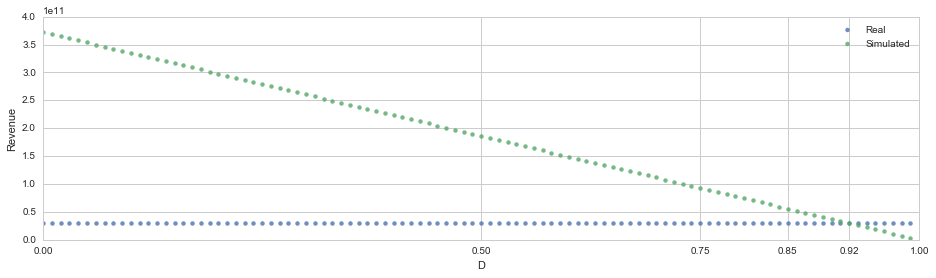

In [101]:
%matplotlib inline
import seaborn as sns

sns.set(rc={'figure.figsize':(15.7,4)})
sns.set_style("whitegrid")

df = pd.DataFrame({'D' : Ds, 'Revenue' : Revenues})

df['Real Revenue'] = 29699000000

ax = sns.regplot(x=df["D"], y=df["Real Revenue"],fit_reg=False,label="Real")
sns.regplot(x=df["D"], y=df["Revenue"],ax = ax, fit_reg=False,label="Simulated")

ax.set(xlim=(0, 1))
ax.set(ylim=(0, 4e11))
ax.set_xticks([0,0.5,0.75,0.85,0.92,1.0])
ax.legend()

In [102]:
D = 0.92
current_bracket_revenue_pnad['pagantes'] = current_bracket_revenue_pnad['pagantes']*(1-D)

print("Tabela atual arrecadado:  {:0,.2f}".format(total_revenue(current_bracket_revenue_pnad)))

current_bracket_revenue_pnad[['renda_mensal_min','renda_mensal_max','pagantes','aliquota']]\
                  .style.format({'renda_mensal_min': '{:0,.2f}', 'renda_mensal_max': '{:0,.2f}', 'pagantes': '{:0,.2f}'})\
                  .bar(subset=['pagantes'], color='#32cd32')\
                  .bar(subset=['aliquota'], color='#45ed42')

Tabela atual arrecadado:  29,781,833,239.17


,renda_mensal_min,renda_mensal_max,pagantes,aliquota
0,0.00,0.00,"468,605.84",0
1,0.01,788.00,"1,939,416.00",0
2,788.01,"1,576.00","2,799,879.04",0
3,"1,576.01","2,364.00","477,717.28",0.075
4,"2,364.01","3,940.00","666,091.28",0.15
5,"3,940.01","7,880.00","439,482.08",0.275
6,"7,880.01","15,760.00","153,270.32",0.275
7,"15,760.01","92,804.10","42,619.84",0.275


O que nos dá um belo e desconfortável valor para D de 93%. O que é como dizer que na média 93% da renda de uma pessoa não é tributável. Com o que sabemos de corrupção no brasil, esperava um valor de D alto, mas não tão alto.

Por hora, vamos assumir que a metodologia é correta e replicar então a PNAD e D na nova tabela:

In [103]:
pl2015_bracket_revenue_pnad = pnad_2015_modified.copy()

aliquotas = []
for renda_media in pnad_2015_modified['renda_mensal_media']:
    for i, row in pl2015_taxbrackets.iterrows():        
        if renda_media >= row['renda_mensal_min'] and (renda_media < row['renda_mensal_max'] or np.isnan(row['renda_mensal_max'])):
            aliquotas.append(row['aliquota'])
    
pl2015_bracket_revenue_pnad['aliquota'] = aliquotas

pl2015_bracket_revenue_pnad['pagantes'][4] = pl2015_bracket_revenue_pnad['pagantes'][4]/2.0
pl2015_bracket_revenue_pnad['aliquota'][4] = pl2015_taxbrackets['aliquota'][1]

C:\Users\Vitor\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Vitor\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [104]:
pl2015_bracket_revenue_pnad['pagantes'] = pl2015_bracket_revenue_pnad['pagantes']*(1.0-D)

In [105]:
print("Tabela nova arrecadado:  {:0,.2f}".format(total_revenue(pl2015_bracket_revenue_pnad)))
pl2015_bracket_revenue_pnad[['renda_mensal_min','renda_mensal_max','pagantes','aliquota']]\
                  .style.format({'renda_mensal_min': '{:0,.2f}', 'renda_mensal_max': '{:0,.2f}', 'pagantes': '{:0,.2f}'})\
                  .bar(subset=['pagantes'], color='#32cd32')\
                  .bar(subset=['aliquota'], color='#45ed42')

Tabela nova arrecadado:  21,327,338,674.46


,renda_mensal_min,renda_mensal_max,pagantes,aliquota
0,0.00,0.00,"468,605.84",0
1,0.01,788.00,"1,939,416.00",0
2,788.01,"1,576.00","2,799,879.04",0
3,"1,576.01","2,364.00","955,434.56",0
4,"2,364.01","3,940.00","333,045.60",0.05
5,"3,940.01","7,880.00","439,482.08",0.1
6,"7,880.01","15,760.00","153,270.32",0.2
7,"15,760.01","92,804.10","42,619.84",0.4


A nova tabela então retira muita gente das faixas pagantes e não compensa com o aumento de impostos dos mais ricos. A arrecadação chega a cair quase 7 bilhões nesse novo esquema. 

O problema desse tipo de análise, mais uma vez, são os mais ricos. Não é razoável assumir uma distribuição uniforme de pessoas entre os riquíssimos. Isso pode estar criando distorções que prejudicam a arrecadação da tabela nova. Podemos resolver isso assumindo algumas coisas a mais.

## Impacto sob influência do hit Xibom bombom

O grupo "As meninas" ilustrou muito bem em seu hit "Xibom bombom" a tendência de acumulação de riquezas da sociedade:

"E o destino todo mundo ja conhece: é que o de cima sobe e o debaixo desce."
-- Meninas, As. Hit Xibom bombom, circa 1999

As meninas foram apenas um dos grupos a perceber esse mecanismo: se uma quantia é distribúida em uma população de acordo com o que os indivíduos já possuem. Em outras áreas da pesquisa ele também é conhecido como [Efeito Mateus](https://en.wikipedia.org/wiki/Matthew_effect), [Lei de Gibrat](https://en.wikipedia.org/wiki/Gibrat%27s_law) ou, simplesmente, [Preferential Attchment](https://en.wikipedia.org/wiki/Preferential_attachment).

Seguindo esse mecanismo, dificilmente a populacão que ganha mais de R$ 15760,00, a última faixa da PNAD, estaria uniformente distribuída em intervalos de renda. Algumas poucas pessoas ganhariam muito dinheiro, e a distribuição seria mais parecida com algo exponencial. Análises sobre Preferential Attchment sugerem algo sobre essa distribuição. Seja r a renda de uma pessoa e F(r) a quantidade de pessoas naquela renda, temos:

$$F(r) = A r^{-\lambda},$$

em que $A$ e $\lambda$ representam parâmetros de escala a serem ajustados aos dados. Aplicando log dos dois lados e desenferrujando um pouco minha algebra de ensino médio, temos:

$$\ln{F(r)} = \ln{A r^{-\lambda}},$$
$$\ln{F(r)} =  -\lambda \ln{r} + \ln{A} .$$

Para ter uma ideia de quais seriam $A$ e $\lambda$, podemos utilizar as Faixas 2 a 6 da PNAD. Eu também poderia ter escolhido uma distribuição um pouco mais complicada e utilizar as Faixas 0 e 1, mas as contas ficariam significamente mais complicadas e não afetariam muito a distribuição de pessoas mais ricas, nosso foco aqui.

[(13, 18)]

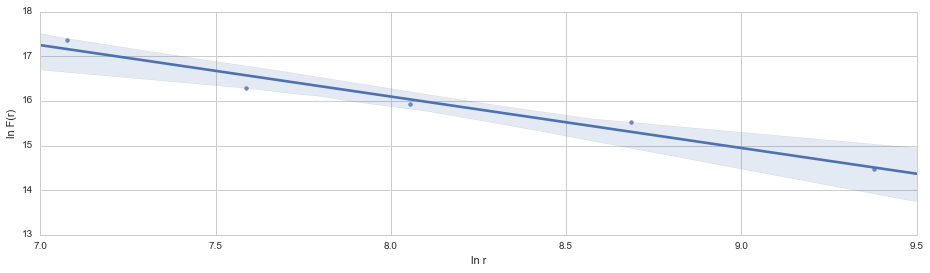

In [106]:
pnad_good = pnad_2015[['renda_mensal_media','pagantes']][2:7]
pnad_good['ln r'] = np.log(pnad_good['renda_mensal_media']) #sim, a função do logaritmo natural no numpy se chama log
pnad_good['ln F(r)'] = np.log(pnad_good['pagantes'])

ax = sns.regplot(x=pnad_good["ln r"], y=pnad_good["ln F(r)"],fit_reg=True,label="log da pnad")

ax.set(xlim=(7, 9.5))
ax.set(ylim=(13, 18))

Que lindo fit de 5 pontos! Perceba que todos eles estão dentro do intervalo de confiança. Na verdade, é extremamente fácil fitar qualquer coisa com 5 observações, então se a gente não tivesse conseguido essa curva aí sim eu estaria preocupado.

Assumindo que tudo deu certo, podemos calcular os coeficientes a partir do fit:

In [107]:
import scipy

lbda, lnA, _,_,_ = scipy.stats.linregress(x=ax.get_lines()[0].get_xdata(),y=ax.get_lines()[0].get_ydata())

print("lambda = %.6f"%(lbda))
print("A = {:0,.2f}".format(np.exp(lnA)))

def pnad_F_r(r):
    return np.exp(lnA)*(r**lbda)

lambda = -1.151819
A = 98,283,032,079.26


A função $F(r)$ nos dá uma boa idéia de como é a distribuição de pessoas de acordo com a renda. É claro que ela não é a distriuição em si, para isso a integral de F(r) a partir do valor na última faixa deveria ser exatamente a quantidade de pessoas na última faixa. Mas também teríamos que assumir uma forma mais complicada para a $F(r)$, sem muitas garantias de que isso retornaria um valor mais exato.

Prosseguindo, vamos simular a renda das cerca de 500mil pessoas da última faixa da PNAD. O procedimento é razoávelmente simples: para uma certa renda $r$, a probabilidade daquela pessoa ser escolhida obedece a F(r), com rendas menores sendo mais prováveis que rendas gigantes, mas ainda assim garantindo que alguns ricos existirão. Preciso ainda assim definir um limite superior para esse experimento, mas agora somente por limitações do método numérico. Em todo caso, grandes valores $r$ são altamente improváveis, então isso não deve fazer muita diferença.

[(15760, 1000000)]

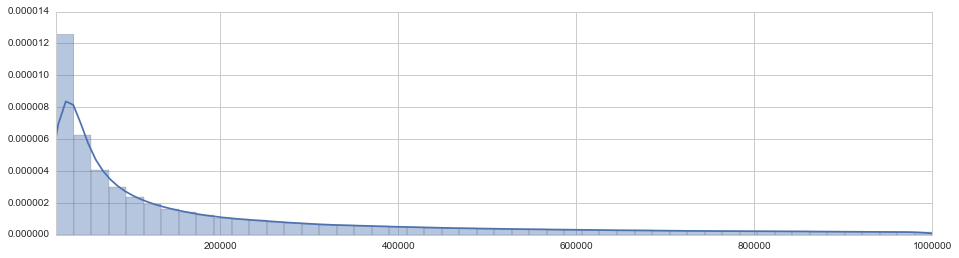

In [108]:
lim_sup_r = int(1e6)

from random import choices

rs = []
Frs = []

for r in range(15760,lim_sup_r):
    rs.append(r)
    Frs.append(pnad_F_r(r)) 

rich_people = choices(population = rs, weights=Frs,k=532748)
ax = sns.distplot(rich_people)

ax.set(xlim=(15760, lim_sup_r))

In [109]:
rich_people_df= pd.DataFrame()
rich_people_df['renda_mensal_media'] = rich_people
rich_people_df['pagantes'] = 1

Agora sim podemos calcular o valor da arrecadação na tabela atual:

In [110]:
rich_people_df['aliquota'] = 0.275
current_bracket_revenue_pnad['pagantes'] = current_bracket_revenue_pnad['pagantes']/(1-D)

pnad_atual_completa = pd.concat([current_bracket_revenue_pnad[['renda_mensal_media','pagantes','aliquota']][0:7],rich_people_df])
print("Tabela atual arrecadado:  {:0,.2f}".format(total_revenue(pnad_atual_completa)))

Tabela atual arrecadado:  652,654,711,549.50


Um valor um pouco maior que do que nossa versao simplificada da seção anterior. Agora podemos calcular o fator de desvio de renda novamente, aqui chamado de $D_2$:

In [111]:
Ds = []
Revenues = []

for D_2 in range(0,100):
    
    tempdf = pnad_atual_completa.copy()
    
    tempdf['pagantes'] = (1.0-D_2/100.0)*tempdf['pagantes'] 
    revenue = total_revenue(tempdf)
    
    Ds.append(D_2/100.0)
    Revenues.append(revenue)

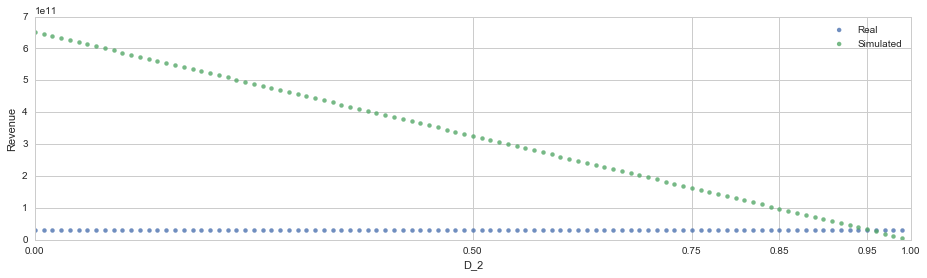

In [112]:
df = pd.DataFrame({'D_2' : Ds, 'Revenue' : Revenues})

df['Real Revenue'] = 29699000000

ax = sns.regplot(x=df["D_2"], y=df["Real Revenue"],fit_reg=False,label="Real")
sns.regplot(x=df["D_2"], y=df["Revenue"],ax = ax, fit_reg=False,label="Simulated")

ax.set(xlim=(0, 1))
ax.set(ylim=(0, 7e11))
ax.set_xticks([0,0.5,0.75,0.85,0.95,1.0])
ax.legend()

Um pouco maior que antes. O que nos deixa com precisamente a arrecadação atual:

In [113]:
D_2 = 0.95
pnad_atual_completa['pagantes'] = pnad_atual_completa['pagantes']*(1-D_2)

print("Tabela atual arrecadado:  {:0,.2f}".format(total_revenue(pnad_atual_completa)))

Tabela atual arrecadado:  32,632,735,577.48


E na nova tabela temos o seguinte impacto:

In [117]:
pl2015_bracket_revenue_pnad['pagantes'] = pl2015_bracket_revenue_pnad['pagantes']/(1-D)
sum(pl2015_bracket_revenue_pnad['pagantes'])

89146916.0

In [120]:
pnad_nova_completa = pd.concat([pl2015_bracket_revenue_pnad[['renda_mensal_media','pagantes']][0:7], 
                                rich_people_df[['renda_mensal_media','pagantes']]])

pl2015_taxbrackets['renda_mensal_max'][8] = lim_sup_r+1

aliquotas = []
for renda_media in pnad_nova_completa['renda_mensal_media']:
    aliquota_set = 0
    
    for i, row in pl2015_taxbrackets.iterrows():        
        if renda_media >= row['renda_mensal_min'] and (renda_media <= row['renda_mensal_max'] or np.isnan(row['renda_mensal_max'])):
            aliquotas.append(row['aliquota'])
            aliquota_set=1
    if aliquota_set == 0:
        print(renda_media)
    
pnad_nova_completa['aliquota'] = aliquotas

pnad_nova_completa['aliquota'][4] = pnad_nova_completa['aliquota'][1]
pnad_nova_completa.head(10)

,renda_mensal_media,pagantes,aliquota
0,0.000,5857573.0,0.00
1,394.005,24242700.0,0.00
2,1182.005,34998488.0,0.00
3,1970.005,11942932.0,0.00
4,3152.005,4163070.0,0.00
5,5910.005,5493526.0,0.10
6,11820.005,1915879.0,0.20
0,16030.000,1.0,0.25
1,716027.000,1.0,0.40
2,122453.000,1.0,0.40


In [ ]:
pnad_nova_completa['pagantes'] = pnad_nova_completa['pagantes']*(1-D_2)

In [122]:
print("Tabela nova arrecadado:  {:0,.2f}".format(total_revenue(pnad_nova_completa)))

Tabela nova arrecadado:  33,043,966,643.90
